# Week 1: Day 5 AM // Pandas: Data Cleaning

## Data Cleaning with Pandas

> According to IBM Data Analytics you can expect to spend up to 80% of your time cleaning data.

**Sources of Missing Values**

Before we dive into code, it’s important to understand the sources of missing data. Here’s some typical reasons why data is missing:

- User forgot to fill in a field.
- Data was lost while transferring manually from a legacy database.
- There was a programming error.
- Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

As you can see, some of these sources are just simple random mistakes. Other times, there can be a deeper reason why data is missing.

Before you start cleaning a data set, it’s a good idea to just get a general feel for the data. After that, you can put together a plan to clean the data.

Start by asking the following questions:

- What are the features?
- What are the expected types (int, float, string, boolean)?
- Is there obvious missing data (values that Pandas can detect)?
- Is there other types of missing data that’s not so obvious (can’t easily detect with Pandas)?


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('property_data.csv')

In [3]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


With the .head()method, we can easily see the first few rows.

Now we can answer our original question, what are my features? It’s pretty easy to infer the following features from the column names:

- ST_NUM: Street number
- ST_NAME: Street name
- OWN_OCCUPIED: Is the residence owner occupied
- NUM_BEDROOMS: Number of bedrooms

We can also answer, what are the expected types?

- ST_NUM: float or int… some sort of numeric type
- ST_NAME: string
- OWN_OCCUPIED: string… Y (“Yes”) or N (“No”)
- NUM_BEDROOMS: float or int, a numeric type

To answer the next two questions, we’ll need to start getting more in-depth width Pandas. Let’s start looking at examples of how to detect missing values.

### Standard Missing Values

So what do I mean by “standard missing values”? These are missing values that Pandas can detect.

Going back to our original dataset, let’s take a look at the “Street Number” column.

<img src='https://miro.medium.com/max/830/0*veOKXtXllBUoIOr-.jpg' />

In the third row there’s an empty cell. In the seventh row there’s an “NA” value.

Clearly these are both missing values. Let’s see how Pandas deals with these.

In [4]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [5]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

Taking a look at the column, we can see that Pandas filled in the blank space with “NA”. Using the `isnull() `method, we can confirm that both the missing value and “NA” were recognized as missing values. Both boolean responses are True.

This is a simple example, but highlights an important point. Pandas will recognize both empty cells and “NA” types as missing values. In the next section, we’ll take a look at some types that Pandas won’t recognize.

### Non-Standard Missing Values

Sometimes it might be the case where there’s missing values that have different formats.

Let’s take a look at the “Number of Bedrooms” column.

<img src='https://miro.medium.com/max/830/0*wlRcCspEXuvanHPP.jpg' />

In this column, there’s four missing values.

- n/a
- NA
- —
- na

From the previous section, we know that Pandas will recognize “NA” as a missing value, but what about the others? Let’s take a look.

In [6]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [7]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

Just like before, Pandas recognized the “NA” as a missing value. Unfortunately, the other types weren’t recognized.

If there’s multiple users manually entering data, then this is a common problem. Maybe i like to use “n/a” but you like to use “na”.

An easy way to detect these various formats is to put them in a list. Then when we import the data, Pandas will recognize them right away. Here’s an example of how we would do that.

In [8]:
missing_values = ["n/a", "na", "--"]

In [9]:
df = pd.read_csv("property_data.csv", na_values = missing_values)

In [10]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [11]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

This time, all of the different formats were recognized as missing values.

You might not be able to catch all of these right away. As you work through the data and see other types of missing values, you can add them to the list.

It’s important to recognize these non-standard types of missing values for purposes of summarizing and transforming missing values. If you try and count the number of missing values before converting these non-standard types, you could end up missing a lot of missing values.

In the next section we’ll take a look at a more complicated, but very common, type of missing value.

### Unexpected Missing Values

So far we’ve seen standard missing values, and non-standard missing values. What if we have an unexpected type?
For example, if our feature is expected to be a string, but there’s a numeric type, then technically this is also a missing value.

Let’s take a look at the “Owner Occupied” column to see what I’m talking about.

<img src='https://miro.medium.com/max/829/0*RPJE5nhrI0Kgu2ls.jpg' />

From our previous examples, we know that Pandas will detect the empty cell in row seven as a missing value. Let’s confirm with some code.

In [12]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [13]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In the fourth row, there’s the number 12. The response for Owner Occupied should clearly be a string (Y or N), so this numeric type should be a missing value.

This example is a little more complicated so we’ll need to think through a strategy for detecting these types of missing values. There’s a number of different approaches, but here’s the way that I’m going to work through this one.

- Loop through the OWN_OCCUPIED column
- Try and turn the entry into an integer
- If the entry can be changed into an integer, enter a missing value
- If the number can’t be an integer, we know it’s a string, so keep going

Let’s take a look at the code and then we’ll go through it in detail.

In [14]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [15]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In the code we’re looping through each entry in the “Owner Occupied” column. To try and change the entry to an integer, we’re using int(row).

If the value can be changed to an integer, we change the entry to a missing value using Numpy’s `np.nan`.

On the other hand, if it can’t be changed to an integer, we pass and keep going.

You’ll notice that we used `try` and `except` `ValueError`. This is called exception handling, and we use this to handle errors.

If we were to try and change an entry into an integer and it couldn’t be changed, then a ValueError would be returned, and the code would stop. To deal with this, we use exception handling to recognize these errors, and keep going.

### Summarizing Missing Values

After we’ve cleaned the missing values, we will probably want to summarize them. For instance, we might want to look at the total number of missing values for each feature.

In [16]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

Other times we might want to do a quick check to see if we have any missing values at all.

In [17]:
df.isnull().values.any()

True

We might also want to get a total count of missing values.

In [18]:
df.isnull().sum().sum()

12

### Replacing

Often times you’ll have to figure out how you want to handle missing values.

Sometimes you’ll simply want to delete those rows, other times you’ll replace them.

In [19]:
# Maybe you just want to fill in missing values with a single value.

df['ST_NUM'].fillna(125, inplace=True)

More likely, you might want to do a location based imputation. Here’s how you would do that.

In [20]:
df.loc[2,'ST_NUM'] = 125

A very common way to replace missing values is using a median.

In [21]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [22]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


## Analyzing Obesity in England

The data is taken from Data.gov.uk. We’ll be using the 2014 XLS file.

Investigate:

> Children are getting fatter every decade

In [23]:
%matplotlib inline
data = pd.ExcelFile('obes.xls')

In [24]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

We will be focusing on sheet 7.2. Now if you look at 7.2 in Excel, you will see that the top 4 rows and bottom 14 rows contain useless info. Let me rephrase: It’s useful for humans, but not for our script. We only need rows 5-18.

In [25]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)

In [26]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


The first line represents the column headers. Right off the bat you can see Pandas is quite smart since it picked up most of the headers correctly. Except for the first one, of course - e.g., Unnamed: 0. Why is that? Simple. Look at the file in Excel, and you see that it is missing a header for the year.

Another problem is that we have an empty line in the original file, and that is showing up as NaN (Not a number).

So we now need to do two things:

- Rename the first header to Year, and
- Get rid of any empty rows.

In [27]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)

Here we told Pandas to rename the column Unnamed: 0 to Year. using the in-built function rename().

> inplace = True modifies the existing object. Without this, Pandas will create a new object and return that.

Next let’s drop the empty rows filled with NaN:

In [28]:
data_age.dropna(inplace=True)

There is one more thing we need to do that will make our lives easier. If you look at the data_age table, the first value is a number. This is the index, and Pandas uses the default Excel practice of having a number as the index. However, we want to change the index to Year. This will make plotting much easier, since the index is usually plotted as the x axis.

In [29]:
data_age.set_index('Year', inplace=True)

In [30]:
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


Now we can plot what we have.

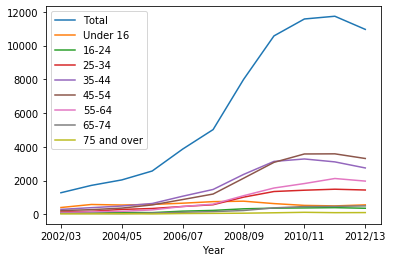

In [31]:
data_age.plot()

Oops. There is a problem: Our original data contains a total field that is overshadowing everything else. We need to get rid of it.

In [32]:
data_age_minus_total = data_age.drop('Total', axis=1)

Let’s plot what we have now.

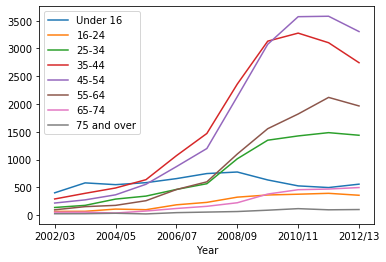

In [33]:
data_age_minus_total.plot()

Much better. We can actually see individual age groups now. Can you see which age group has the highest obesity?

Coming back to our original question: Are children getting fatter?

Let’s just plot a small section of the data: children under the age of 16 and grown ups in the age range of 35-44.

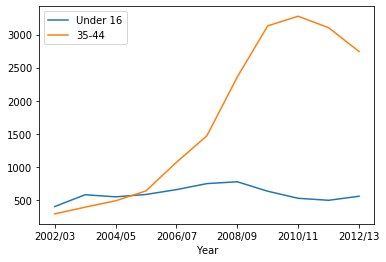

In [34]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)

So who is getting fatter?

While children’s obesity has gone slightly down, their parents have ballooned. So it seems the parents need to worry about themselves rather than their children.

## Time Series

### Basic Time Series Manipulation


First import the libraries we’ll be working with and then use them to create a date range.

In [35]:
from datetime import datetime

In [36]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')

This date range has timestamps with an hourly frequency. If we call `date_rng` we’ll see that it looks like the following:

In [37]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

Let’s create an example data frame with the timestamp data and look at the first 15 elements:

In [38]:
df = pd.DataFrame(date_rng, columns=['date'])

In [39]:
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [40]:
df.head()

,date,data
0,2020-01-01 00:00:00,47
1,2020-01-01 01:00:00,13
2,2020-01-01 02:00:00,29
3,2020-01-01 03:00:00,49
4,2020-01-01 04:00:00,24


If we want to do time series manipulation, we’ll need to have a date time index so that our data frame is indexed on the timestamp.

Convert the data frame index to a datetime index then show the first elements:

In [41]:
df['datetime'] = pd.to_datetime(df['date'])

In [42]:
df = df.set_index('datetime')

In [43]:
df.drop(['date'], axis=1, inplace=True)

In [44]:
df.head()

,data
datetime,
2020-01-01 00:00:00,47
2020-01-01 01:00:00,13
2020-01-01 02:00:00,29
2020-01-01 03:00:00,49
2020-01-01 04:00:00,24


What if our ‘time’ stamps in our data are actually string type vs. numerical?

Let’s convert our date_rng to a list of strings and then convert the strings to timestamps.

In [45]:
string_date_rng = [str(x) for x in date_rng]

In [46]:
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

We can convert the strings to timestamps by inferring their format, then look at the values:

In [47]:
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)

In [48]:
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

But what about if we need to convert a unique string format?

Let’s create an arbitrary list of dates that are strings and convert them to timestamps:

In [49]:
string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']

In [50]:
timestamp_date_rng_2 = [datetime.strptime(x,'%B-%d-%Y') for x in string_date_rng_2]

In [51]:
timestamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

What does it look like if we put this into a data frame?

In [52]:
df2 = pd.DataFrame(timestamp_date_rng_2, columns=['date'])

In [53]:
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


Going back to our original data frame, let’s look at the data by parsing on timestamp index:

Say we just want to see data where the date is the 2nd of the month, we could use the index as per below.

In [54]:
df[df.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,44
2020-01-02 01:00:00,53
2020-01-02 02:00:00,61
2020-01-02 03:00:00,52
2020-01-02 04:00:00,84
2020-01-02 05:00:00,74
2020-01-02 06:00:00,68
2020-01-02 07:00:00,33
2020-01-02 08:00:00,75


We could also directly call a date that we want to look at via the index of the data frame:

In [55]:
df['2020-01-03']

,data
datetime,
2020-01-03 00:00:00,32
2020-01-03 01:00:00,70
2020-01-03 02:00:00,34
2020-01-03 03:00:00,20
2020-01-03 04:00:00,46
2020-01-03 05:00:00,93
2020-01-03 06:00:00,59
2020-01-03 07:00:00,3
2020-01-03 08:00:00,27


What about selecting data between certain dates?

In [56]:
df['2020-01-04':'2020-01-06']

,data
datetime,
2020-01-04 00:00:00,68
2020-01-04 01:00:00,86
2020-01-04 02:00:00,10
2020-01-04 03:00:00,53
2020-01-04 04:00:00,73
...,...
2020-01-06 19:00:00,15
2020-01-06 20:00:00,11
2020-01-06 21:00:00,87


The basic data frame that we’ve populated gives us data on an hourly frequency, but we can resample the data at a different frequency and specify how we would like to compute the summary statistic for the new sample frequency. 

We could take the min, max, average, sum, etc., of the data at a daily frequency instead of an hourly frequency as per the example below where we compute the daily average of the data:

In [57]:
df.resample('D').mean()

,data
datetime,
2020-01-01,43.541667
2020-01-02,61.500000
2020-01-03,49.250000
2020-01-04,56.875000
2020-01-05,46.916667
2020-01-06,41.666667
2020-01-07,44.041667
2020-01-08,56.000000


What about window statistics such as a rolling mean or a rolling sum?

Let’s create a new column in our original df that computes the rolling sum over a 3 window period and then look at the top of the data frame:

In [58]:
df['rolling_sum'] = df.rolling(3).sum()

In [59]:
df.head()

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,47,NaN
2020-01-01 01:00:00,13,NaN
2020-01-01 02:00:00,29,89.0
2020-01-01 03:00:00,49,91.0
2020-01-01 04:00:00,24,102.0


We can see that this is computing correctly and that it only starts having valid values when there are three periods over which to look back.

This is a good chance to see how we can do forward or backfilling of data when working with missing data values.

Here’s our df but with a new column that takes the rolling sum and backfills the data:

In [60]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')

In [61]:
df.head()

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,47,NaN,89.0
2020-01-01 01:00:00,13,NaN,89.0
2020-01-01 02:00:00,29,89.0,89.0
2020-01-01 03:00:00,49,91.0,91.0
2020-01-01 04:00:00,24,102.0,102.0


### Time Series on Dataset

In [62]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

The DataFrame has 4383 rows, covering the period from January 1, 2006 through December 31, 2017. To see what the data looks like, let’s use the `head()` and `tail()` methods to display the first three and last three rows.

In [63]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [64]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


Now that the Date column is the correct data type, let’s set it as the DataFrame’s index.

In [65]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [66]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

Alternatively, we can consolidate the above steps into a single line, using the index_col and parse_dates parameters of the `read_csv()` function. This is often a useful shortcut.

In [67]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [68]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


Another useful aspect of the DatetimeIndex is that the individual date/time components are all available as attributes such as year, month, day, and so on. Let’s add a few more columns to opsd_daily, containing the year, month, and weekday.

In [69]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [70]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


We can select data for a single day using a string such as '2017-08-10'.

In [71]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

We can also select a slice of days, such as '2014-01-20':'2014-01-22'. As with regular label-based indexing with loc, the slice is inclusive of both endpoints.

In [72]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


Another very handy feature of pandas time series is partial-string indexing, where we can select all date/times which partially match a given string. For example, we can select the entire year 2006 with `opsd_daily.loc['2006']`, or the entire month of February 2012 with `opsd_daily.loc['2012-02']`.

In [73]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


We can easily visualize our time series data. In this section, we’ll cover a few examples and some useful customizations for our time series plots.

Let’s create a line plot of the full time series of Germany’s daily electricity consumption, using the DataFrame’s `plot()` method.

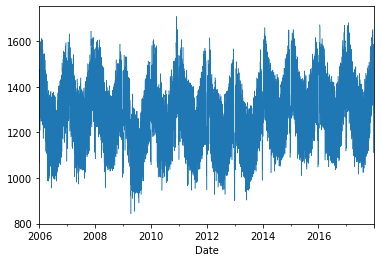

In [74]:
opsd_daily['Consumption'].plot(linewidth=0.5);

We can see that the plot() method has chosen pretty good tick locations (every two years) and labels (the years) for the x-axis, which is helpful. However, with so many data points, the line plot is crowded and hard to read.

Let’s plot the data as dots instead, and also look at the Solar and Wind time series.

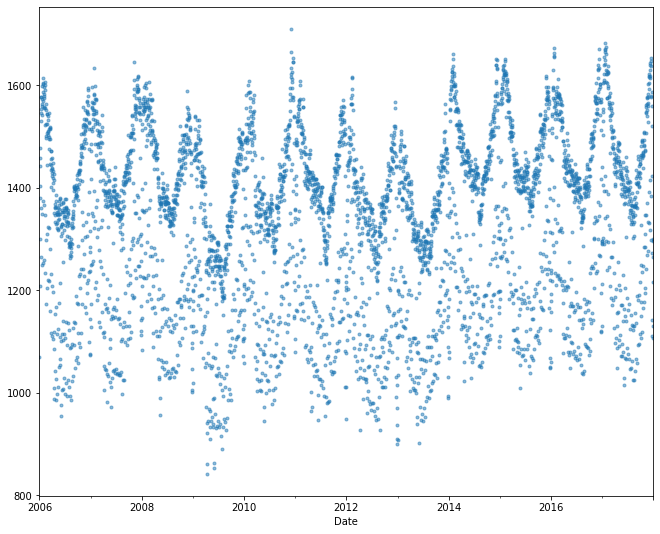

In [75]:
opsd_daily['Consumption'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

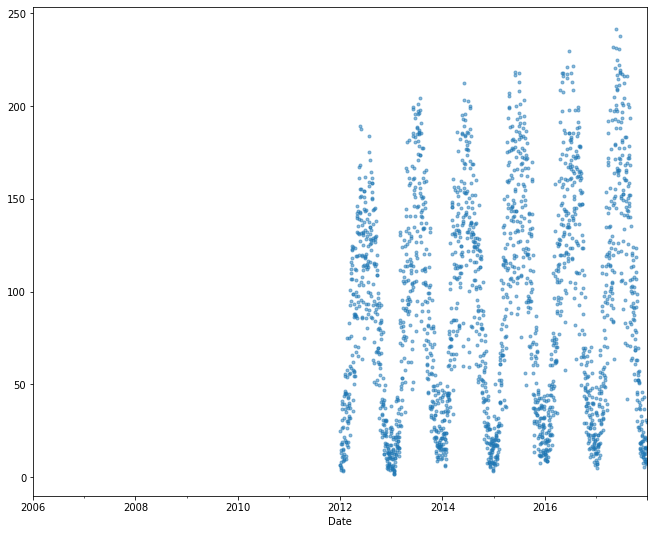

In [76]:
opsd_daily['Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

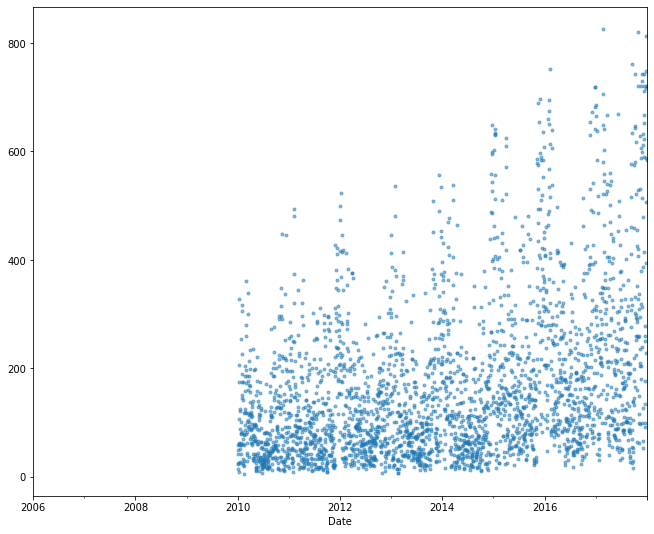

In [77]:
opsd_daily['Wind'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

We can already see some interesting patterns emerge:

- Electricity consumption is highest in winter, presumably due to electric heating and increased lighting usage, and lowest in summer.
- Solar power production is highest in summer, when sunlight is most abundant, and lowest in winter.
- Wind power production is highest in winter, presumably due to stronger winds and more frequent storms, and lowest in summer.
- There appears to be a strong increasing trend in wind power production over the years.

All three time series clearly exhibit periodicity—often referred to as seasonality in time series analysis—in which a pattern repeats again and again at regular time intervals. The Consumption, Solar, and Wind time series oscillate between high and low values on a yearly time scale, corresponding with the seasonal changes in weather over the year. However, seasonality in general does not have to correspond with the meteorological seasons. For example, retail sales data often exhibits yearly seasonality with increased sales in November and December, leading up to the holidays.

Seasonality can also occur on other time scales. The plot above suggests there may be some weekly seasonality in Germany’s electricity consumption, corresponding with weekdays and weekends. Let’s plot the time series in a single year to investigate further.

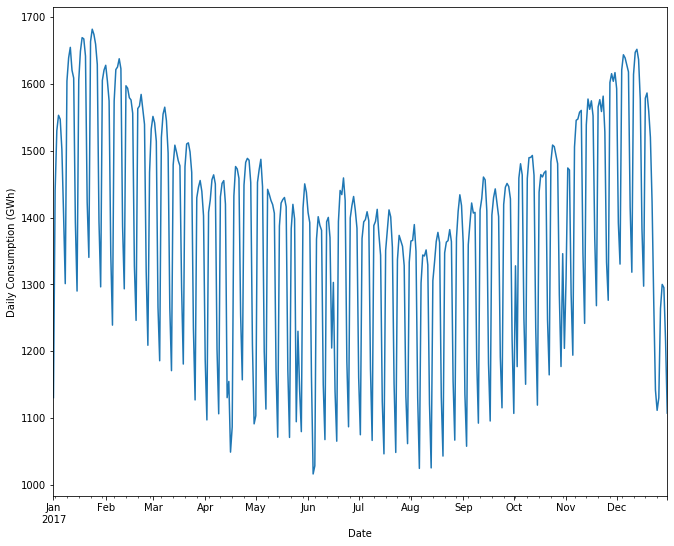

In [78]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)');

Now we can clearly see the weekly oscillations. Another interesting feature that becomes apparent at this level of granularity is the drastic decrease in electricity consumption in early January and late December, during the holidays.

Let’s zoom in further and look at just January and February.

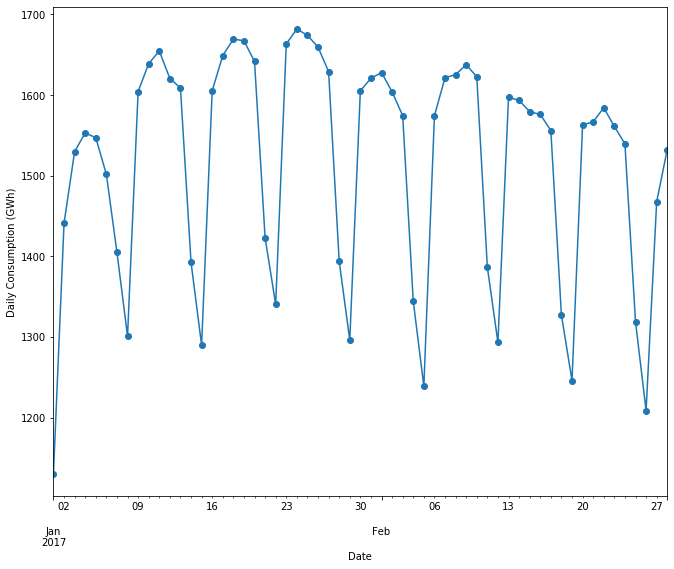

In [79]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-', figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)');

Next, let’s further explore the seasonality of our data with box plots function to group the data by different time periods and display the distributions for each group. We’ll first group the data by month, to visualize yearly seasonality.

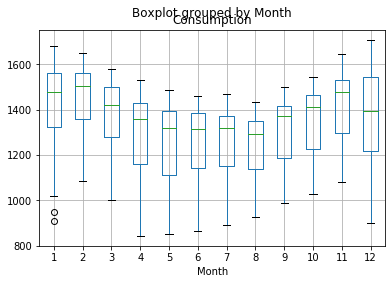

In [80]:
opsd_daily.boxplot(column=['Consumption'], by='Month')

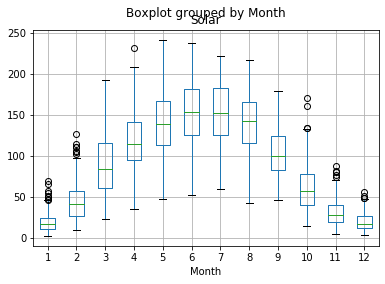

In [81]:
opsd_daily.boxplot(column=['Solar'], by='Month')

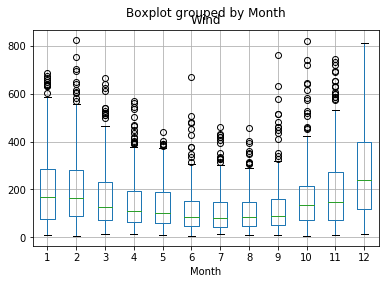

In [82]:
opsd_daily.boxplot(column=['Wind'], by='Month')

These box plots confirm the yearly seasonality that we saw in earlier plots and provide some additional insights:

- Although electricity consumption is generally higher in winter and lower in summer, the median and lower two quartiles are lower in December and January compared to November and February, likely due to businesses being closed over the holidays. We saw this in the time series for the year 2017, and the box plot confirms that this is consistent pattern throughout the years.
- While solar and wind power production both exhibit a yearly seasonality, the wind power distributions have many more outliers, reflecting the effects of occasional extreme wind speeds associated with storms and other transient weather conditions.

Next, let’s group the electricity consumption time series by day of the week, to explore weekly seasonality.

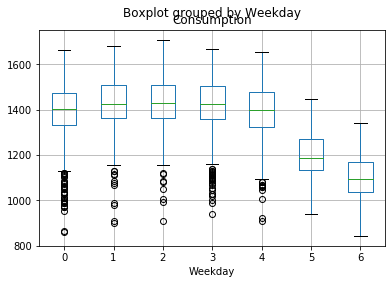

In [83]:
opsd_daily.boxplot(column=['Consumption'], by='Weekday')

As expected, electricity consumption is significantly higher on weekdays than on weekends. The low outliers on weekdays are presumably during holidays.

It is often useful to resample our time series data to a lower or higher frequency. Resampling to a lower frequency (downsampling) usually involves an aggregation operation — for example, computing monthly sales totals from daily data. Resampling to a higher frequency (upsampling) is less common and often involves interpolation or other data filling method — for example, interpolating hourly weather data to 10 minute intervals for input to a scientific model.

We will focus here on downsampling, exploring how it can help us analyze our OPSD data on various time scales. We use the DataFrame’s `resample()` method, which splits the DatetimeIndex into time bins and groups the data by time bin. The `resample()` method returns a Resampler object, similar to a pandas GroupBy object. We can then apply an aggregation method such as `mean(), median(), sum()`, etc., to the data group for each time bin.

For example, let’s resample the data to a weekly mean time series.

In [84]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


The first row above, labelled 2006-01-01, contains the mean of all the data contained in the time bin 2006-01-01 through 2006-01-07. The second row, labelled 2006-01-08, contains the mean data for the 2006-01-08 through 2006-01-14 time bin, and so on. By default, each row of the downsampled time series is labelled with the left edge of the time bin.

By construction, our weekly time series has 1/7 as many data points as the daily time series. We can confirm this by comparing the number of rows of the two DataFrames.

In [85]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


Let’s plot the daily and weekly Solar time series together over a single six-month period to compare them.

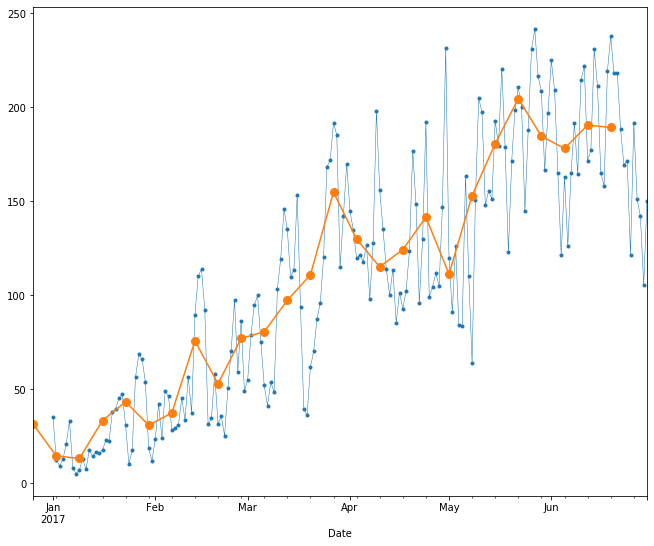

In [86]:
start, end = '2017-01', '2017-06'

opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))

We can see that the weekly mean time series is smoother than the daily time series because higher frequency variability has been averaged out in the resampling.